## Section D. Ridge Regression

### Question 5 [Ridge Regression, 25 Marks]

#### Load libraries

In [1]:
#libraries
library(ggplot2) # for plotting functions.
library(reshape2) # for reshape table

#### 2. Weight update steps of stochastic gradient descent (SGD)

Add L2 regularisation to SGD

In [26]:
# auxiliary function to calculate labels based on the estimated coefficients
predict_func <- function(Phi, w){
    return(Phi%*%w)
} 

# auxiliary function to calculate a cost function
error_func <- function (Phi, w,label,lambda){
    return((sum((predict_func(Phi, w) - label)^2) + sum(lambda * w^2))/2)
}


In [27]:
# Weight update (use code from activity 2.1)
SGD <- function(lambda){
    while(!terminate){
        # check termination criteria:
        terminate <- tau >= tau.max 

        # shuffle data:
        train.index <- sample(1:train.len, train.len, replace = FALSE)
        Phi <- Phi[train.index,]
        T <- T[train.index]

        # for each datapoint:
        for (i in 1:train.len){
            # check termination criteria:
            if (tau >= tau.max) {terminate<-TRUE;break}

            t_pred = predict_func(Phi[i,], W[tau,])
            # for each coefficient:
            for (j in 1: ncol(W)){
                # update the coefficient:
                W[(tau+1),j] <- W[tau,j] + eta * ((T[i]-t_pred) * Phi[i,j] + lambda * W[tau,j])
            }

            # record the error:
            error[tau, 'train'] <- error_func(as.matrix(cbind(1, train.data)), W[tau,],train.label, lambda)
            error[tau, 'test'] <- error_func(as.matrix(cbind(1, test.data)), W[tau,],test.label, lambda)

            # update the counter:
            tau <- tau + 1        
        }
    }
    error.m <- melt(error[1:tau,], id='tau')
    return(error.m)
}

#### 3. L2 norm regularization

#### Import data

In [28]:
# read data from folder
train_1C  <- read.csv("./Task1C_train.csv")
test_1C <- read.csv("./Task1C_test.csv")

In [29]:
# subset data into subsets
train.data <- train_1C[,-5]
train.label <- train_1C[,5]
test.data <- test_1C[,-5]
test.label <- test_1C[,5]

# calculate number of rows
train.len <- nrow(train.data)

In [30]:
# project data using a basis function (identical here)
Phi <- as.matrix(cbind('X0'=1, train.data)) # add a column of 1 as phi_0

T <- train.label # rename just for conviniance

tau.max <- 20*nrow(train.data) # maximum number of iterations
eta <- 0.01 # learning rate
#epsilon <- 0.1 * mean(T) # a threshold on the cost (to terminate the process)

W <- matrix(,nrow=tau.max, ncol=ncol(Phi)) # be used to store the estimated oefficients

set.seed(12)
W[1,] <- runif(ncol(Phi)) # initial weight (any better idea?)

error <- data.frame('tau'=1:tau.max)  # to be used to trace the test and training errors in each iteration

tau <- 1 # iteration counter

terminate <- FALSE

lambda  <- seq(0,10,0.5)

In [31]:
lambda

[1]  0.0  0.5  1.0  1.5  2.0  2.5  3.0  3.5  4.0  4.5  5.0  5.5  6.0  6.5  7.0
[16]  7.5  8.0  8.5  9.0  9.5 10.0

In [32]:
# calcualte the train and test error of SGD with l2 for lamda = 1
error.m <- SGD(1)

In [33]:
# check the errors
error.m

tau,variable,value
<int>,<fct>,<dbl>
1,train,2.758119e+08
2,train,4.712117e+17
3,train,7.729713e+26
4,train,1.323957e+36
5,train,2.172095e+45
6,train,3.588732e+54
7,train,5.935214e+63
8,train,9.925906e+72
9,train,1.628345e+82


In [ ]:
# calculate train and etst error for all lamdas
#for (i in lamda){
#    error.m <- SGD(i)
    
#}

Warning message:
"Removed 15824 row(s) containing missing values (geom_path)."


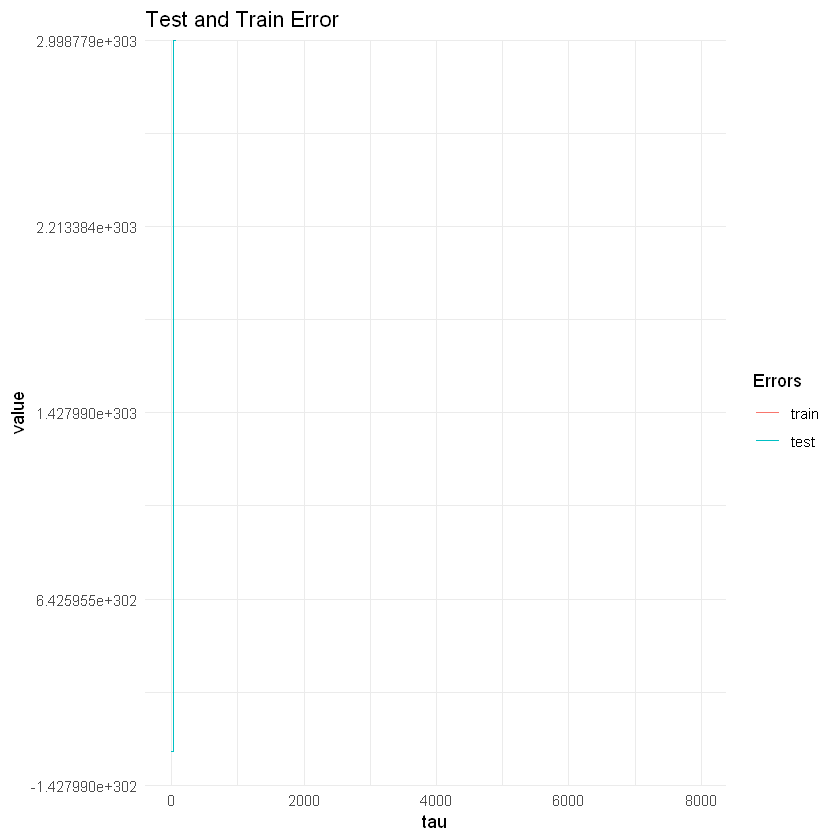

In [101]:
# plot the errors
ggplot(data=error.m, aes(x=tau, y=value, color=variable)) +
    geom_line() + ggtitle('Test and Train Error') +
    scale_color_discrete(guide = guide_legend(title = 'Errors')) +theme_minimal()

I could not identify the problem in the codes causing the errors to keep increasing after weight updates. The issue here causes the plot can not graphed properly but i still would like to talk about the relationship between lambda, model complexity, and
error rates, corresponding to underfitting and overfitting.

The aim of L2 regularisation is to avoid overfitting in complex model through shrinking the coefficients. In this case, the coefficients of weights are penalized at a magnitude decide by the choice of lambda. We should expect the model complexity to decrease as lambda increases, as the amount of the penalty applied increases, thus avoid the model to be overfitting. Also, when lambda increases, the model become less complex, which means the bias may increase and variance may decrease. In other words, the train error will increase and test error will decrease.

